In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [3]:
data = pd.read_csv('FBI Crime Data 2013.csv')
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
# Data cleaning

# Rename columns
data.columns = [['City', 'Population', 'Violent Crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Agg Assault', 'Property Crime',
                'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']]

cols = ['Population', 'Violent Crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Agg Assault', 'Property Crime',
        'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']

# Replace all NaN with 0
data[cols] = data[cols].replace(np.nan, 0)

In [5]:
# Add New Boolean columns for Murder and Robbery
data['PopSq'] = data['Population'] ** 2
data['MurderBool'] = np.where((data['Murder'] >= 1), 1, 0)
data['RobberyBool'] = np.where((data['Robbery'] >= 1), 1, 0)

In [6]:
data.head()

,City,Population,Violent Crime,Murder,Rape1,Rape2,Robbery,Agg Assault,Property Crime,Burglary,Larceny,Vehicle Theft,Arson,PopSq,MurderBool,RobberyBool
0,Adams Village,1861,0,0,0.0,0,0,0,12,2,10,0,0.0,3463321,0,0
1,Addison Town and Village,2577,3,0,0.0,0,0,3,24,3,20,1,0.0,6640929,0,0
2,Akron Village,2846,3,0,0.0,0,0,3,16,1,15,0,0.0,8099716,0,0
3,Albany,97956,791,8,0.0,30,227,526,4090,705,3243,142,0.0,9595377936,1,1
4,Albion Village,6388,23,0,0.0,3,4,16,223,53,165,5,0.0,40806544,0,1


In [13]:
regr = linear_model.LinearRegression()
Y = data['Property Crime'].values.reshape(-1, 1)
X = data['Robbery']
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('\nIntercept:  \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X, Y))

Coefficients: 
 [[7.41607812]]

Intercept:  
 [251.95717816]

R-Squared:
0.9964770262187022


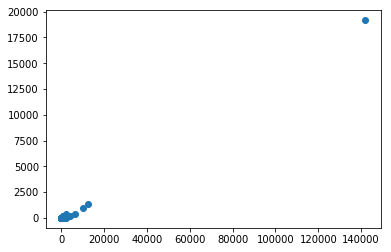

In [15]:
plt.scatter(data['Property Crime'], data['Robbery'])
plt.show()